In [0]:
# !pip install scikit-learn
# !pip install pandas
# !pip install emoji
# !pip install num2words
# !pip install nltk
# !pip install matplotlib
# !pip install wordcloud

#test

In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
from wordcloud import WordCloud


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stefi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stefi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
def read_df_from_json(url):
    data_list = []

    with open(url, 'r') as file:
        for line in file:
            data = json.loads(line)
            label = ""
            if "overall" in data and "reviewText" in data and "summary" in data:
                if data["overall"] == 3.0:
                    label = "neutral"
                elif data["overall"] > 3.0:
                    label = "positive"
                elif data["overall"] < 3.0:
                    label = "negative"
                data_list.append({"label": label, "overall": data["overall"], "reviewText": data["reviewText"], "summary": data["summary"]})

        df = pd.DataFrame(data_list)
        df.drop_duplicates(subset=["reviewText"], inplace=True)
    
        return df
    return []


In [5]:
def concatenate_dfs(list_of_links):
    dfs = []

    for link in list_of_links:
        dfs.append(read_df_from_json(link))
    
    big_df = pd.concat(dfs, ignore_index=True)
    
    return big_df 


In [6]:
links = ['data/AMAZON_FASHION_5.json','data/All_Beauty_5.json','data/Luxury_Beauty_5.json','data/Clothing_Shoes_and_Jewelry_5.json']
df  = concatenate_dfs(links)

FileNotFoundError: [Errno 2] No such file or directory: 'data/AMAZON_FASHION_5.json'

In [7]:
print("neutre:", df["label"].value_counts()["neutral"])
print("pozitive:", df["label"].value_counts()["positive"])
print("negative:", df["label"].value_counts()["negative"])

neutre: 876977
pozitive: 6520468
negative: 901322


In [6]:
# def create_test_train_samples(df):
# #     df = df.sort_values(by='label', ascending=True)
#     positive_labels = df[df['label'] == 'positive']
#     negative_labels = df[df['label'] == 'negative']
#     neutre_labels = df[df['label'] == 'neutral']


#     print(positive_labels.shape)
#     print(negative_labels.shape)
#     print(neutre_labels.shape)
#     print(df)
    

# create_test_train_samples(df)    

In [12]:
def split_and_write_csv(input_df, train_size_per_class=15000, test_size_per_class=2000):
    grouped = input_df.groupby('label')

    train_data = pd.DataFrame()
    train_labels = pd.DataFrame()
    test_data = pd.DataFrame()
    test_labels = pd.DataFrame()
    
    train_data_plot = pd.DataFrame()
    test_data_plot = pd.DataFrame()

    for group_name, group_df in grouped:
        shuffled_group_df = group_df.sample(frac=1, random_state=42)

        train_group, test_group = train_test_split(shuffled_group_df, train_size=train_size_per_class, test_size=test_size_per_class, random_state=42)
        
        train_data = pd.concat([train_data, train_group['reviewText']]) 
        train_labels = pd.concat([train_labels, train_group['label']])

        test_data = pd.concat([test_data, test_group['reviewText']])
        test_labels = pd.concat([test_labels, test_group['label']])
        
        train_data_plot = pd.concat([train_data_plot, train_group])  
        test_data_plot = pd.concat([test_data_plot, test_group])
        
    
    shuffled_train_data = train_data.sample(frac=1, random_state=42)
    shuffled_train_labels = train_labels.sample(frac=1, random_state=42)

    shuffled_train_data.rename(columns={0: "text"}, inplace=True)
    shuffled_train_labels.rename(columns={0: "label"}, inplace=True)
    
    test_data.rename(columns={0: "text"}, inplace=True)
    test_labels.rename(columns={0: "label"}, inplace=True)
    
    shuffled_train_data.to_csv('data/shuffled_train_data.csv', index=False)
    shuffled_train_labels.to_csv('data/shuffled_train_labels.csv', index=False)
    test_data.to_csv('data/test_data.csv', index=False)
    test_labels.to_csv('data/test_labels.csv', index=False)
    train_data_plot.to_csv('data/train_data_plot.csv', index=False)
    test_data_plot.to_csv('data/test_data_plot.csv', index=False)


In [0]:
split_and_write_csv(df)

In [2]:

train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape


(45000, 1)

In [19]:
class Preprocessor:

    def __init__(self,stop_words, lemmatizer, stemmer, lowercase, no_links, no_tags, no_mentions, no_punctuation, num2words, tokens, no_stopwords, lemma, stem):
        self.stop_words = stop_words
        self.lemmatizer = lemmatizer
        self.stemmer = stemmer
        self.lowercase = lowercase
        self.no_links = no_links
        self.no_tags = no_tags
        self.no_mentions = no_mentions
        self.no_punctuation = no_punctuation
        self.num2words = num2words
        self.tokens = tokens
        self.no_stopwords = no_stopwords
        self.lemma = lemma
        self.stem = stem


    def preprocess(self, text):

        if self.lowercase:
            text =  text.lower()
    
        if  self.no_links:
            text = re.sub(r'http\S+', '', text)
    
        if  self.no_tags:
            text = re.sub(r'#[a-zA-Z0-9_]+','', text)
    
        if  self.no_mentions:
            text = re.sub(r'@[a-zA-Z0-9_]+','', text)
    
        if  self.no_punctuation:
            text = re.sub(r'[^\w\s]', ' ', text)
            text = re.sub(r'\s+', ' ', text).strip()
    
        if  self.num2words:
            text = " ".join([num2words(word) if word.isdigit() else word for word in text.split()])
        else:
            text = re.sub(r'[\d+]', ' ', text)
    
        if self.tokens:
            text = [word for word in text.split()]
    
        if  self.no_stopwords:
            text = [word for word in text if word not in self.stop_words]
    
        if  self.lemma:
            text = [self.lemmatizer.lemmatize(token) for token in text]
        elif self.stem:
            text = [self.stemmer.stem(token) for token in text]
    
        return text
    

In [20]:
preprocessor = Preprocessor(set(stopwords.words('english')), WordNetLemmatizer(), PorterStemmer(), True, True, True, True, True, False, True, True, True, False)

preprocessed_data = pd.DataFrame(columns=['text'])

preprocessed_data['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)


In [12]:
print(train_data)
print(preprocessed_data)

                                                    text
0      Levi's changed their fit without telling anyon...
1      it fitted too small to my niece, we had to fix...
2      These are just the very best quality tweezers....
3      Finally received a reply from Invicta customer...
4      Perfect fit and easy to care for. This dress i...
...                                                  ...
44995  Love the style but came with a hole in crotch ...
44996  This Turtleneck fits perfect with a good feel ...
44997  This ring looks great on my husbands hand. It ...
44998  This is an odd shoe arch-on an inside flyer .i...
44999  Nice to look at but poorly made. Sleeves are t...

[45000 rows x 1 columns]
                                                    text
0      [levi, changed, fit, without, telling, anyone,...
1                            [fitted, small, niece, fix]
2      [best, quality, tweezer, able, grab, smallest,...
3      [finally, received, reply, invicta, customer, ...
4    

In [25]:
def generate_wordcloud(df):
  wordcloud = WordCloud(max_font_size=50, max_words=3000, background_color="white")
  # tags = [", ".join(df["text"])]
  tokens = df["text"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
  print( df["text"])  
  # Concatenate all strings in the "text" column
  text = tokens.dropna().values
  wordcloud_picture = wordcloud.generate(", ".join(text))

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

0        [levi, changed, fit, without, telling, anyone,...
1                              [fitted, small, niece, fix]
2        [best, quality, tweezer, able, grab, smallest,...
3        [finally, received, reply, invicta, customer, ...
4        [perfect, fit, easy, care, dress, smashing, fi...
                               ...                        
44995         [love, style, came, hole, crotch, stitching]
44996    [turtleneck, fit, perfect, good, feel, purchas...
44997    [ring, look, great, husband, hand, look, like,...
44998    [odd, shoe, arch, inside, flyer, say, take, ti...
44999     [nice, look, poorly, made, sleeve, short, small]
Name: text, Length: 45000, dtype: object


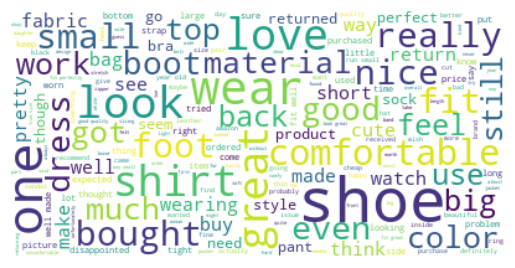

In [26]:
generate_wordcloud(preprocessed_data)
# generate_wordcloud(test_data_plot)

In [14]:
def plot_cifre_per_clasa(label, color, data_csv, label_csv):
    data_per_clasa = data_csv[data_csv['label'] == label]

    digit_frequencies = {str(i): 0 for i in range(10)}

    for text in data_per_clasa['reviewText']:
        for char in text:
            if char.isdigit():
                digit_frequencies[char] += 1
    
    labels = list(digit_frequencies.keys())
    frequencies = list(digit_frequencies.values())
    
    plt.bar(labels, frequencies, color=color)
    
    plt.xlabel("Digits")
    plt.ylabel("Frequency")
    plt.title(f"The distribution of digits in the {label} class on {label_csv}")
    plt.show()


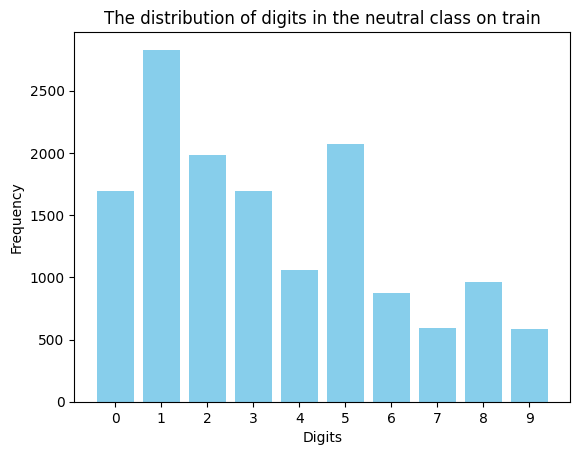

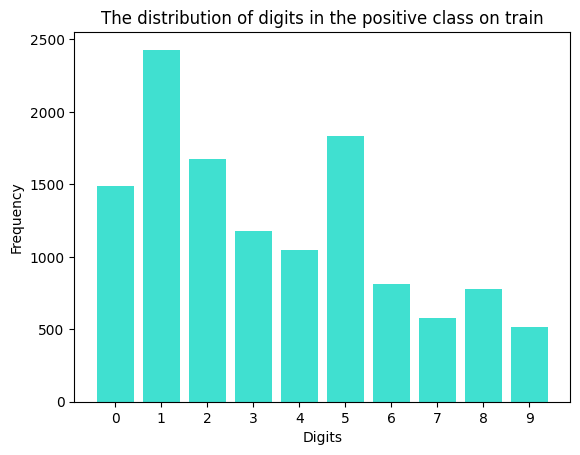

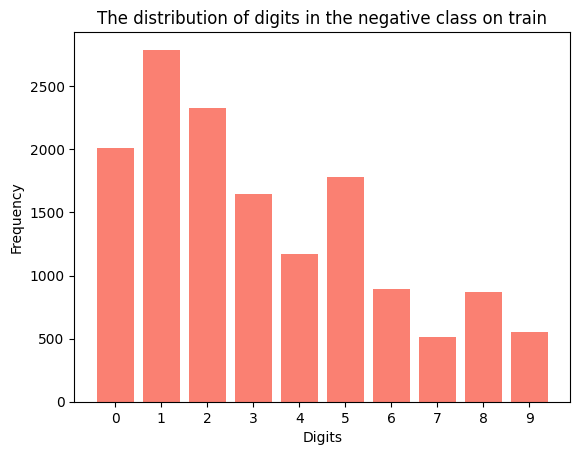

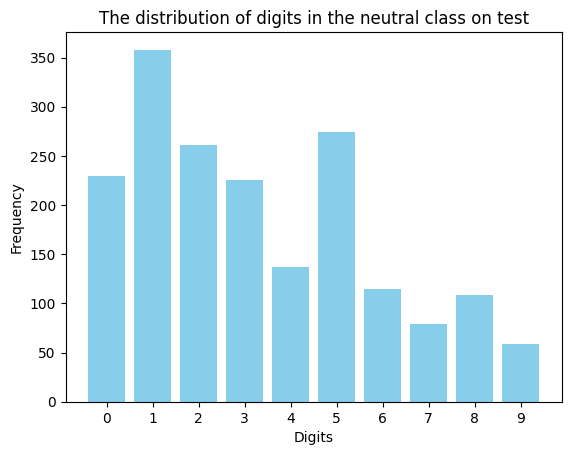

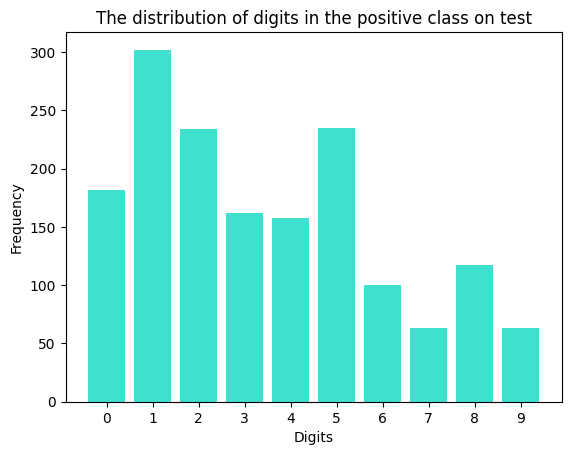

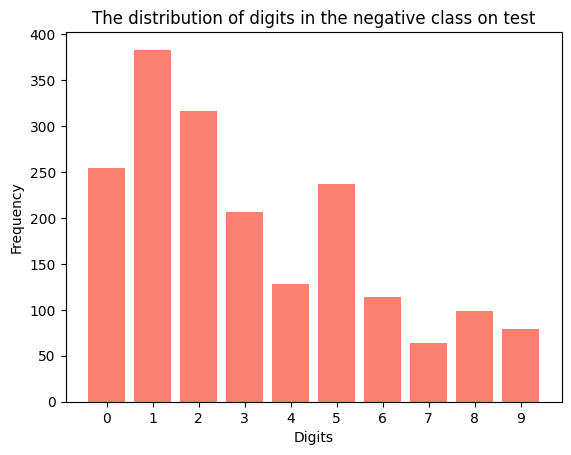

In [15]:
plot_cifre_per_clasa('neutral', 'skyblue', train_data_plot, 'train')
plot_cifre_per_clasa('positive', 'turquoise', train_data_plot, 'train')
plot_cifre_per_clasa('negative', 'salmon', train_data_plot, 'train')

plot_cifre_per_clasa('neutral', 'skyblue', test_data_plot, 'test')
plot_cifre_per_clasa('positive', 'turquoise', test_data_plot, 'test')
plot_cifre_per_clasa('negative', 'salmon', test_data_plot, 'test')

In [19]:
stop_words = set(stopwords.words('english'))

def plot_stopwords_per_clasa(label, color, data_csv, label_csv):
    data_per_clasa_words = data_csv[data_csv['label'] == label]['reviewText'].str.split()
   
    stops_count = defaultdict(int)
    for words in data_per_clasa_words:
        for word in words:
            if word.lower() in stop_words:
                stops_count[word] += 1
  
    stops_count = sorted(stops_count.items(), key= lambda x: x[1], reverse=True)
    stops_count = dict(stops_count[:15])
    
    plt.bar(stops_count.keys(), stops_count.values(), color=color)    
    plt.xlabel("Stopword")
    plt.ylabel("Frequency")
    plt.title(f"The distribution of the 15 most frequent stopwords in the {label} class on {label_csv}")
    plt.show() 


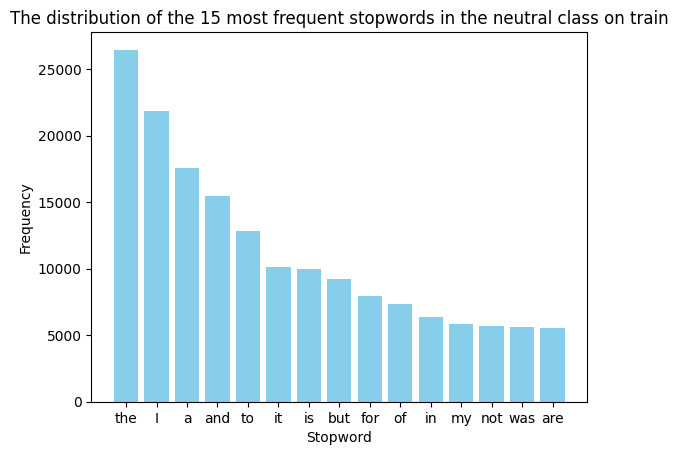

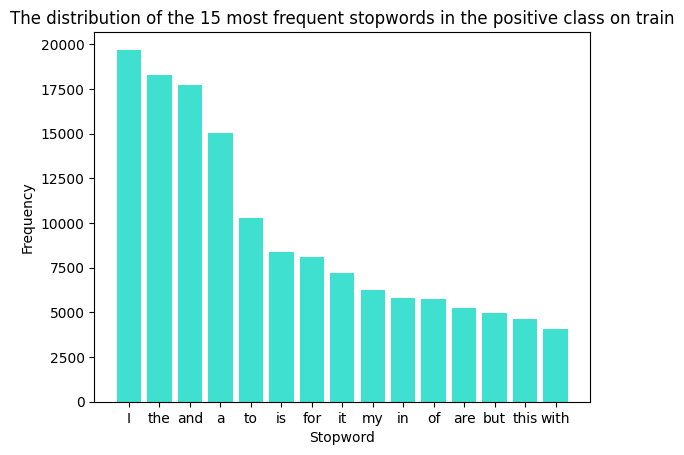

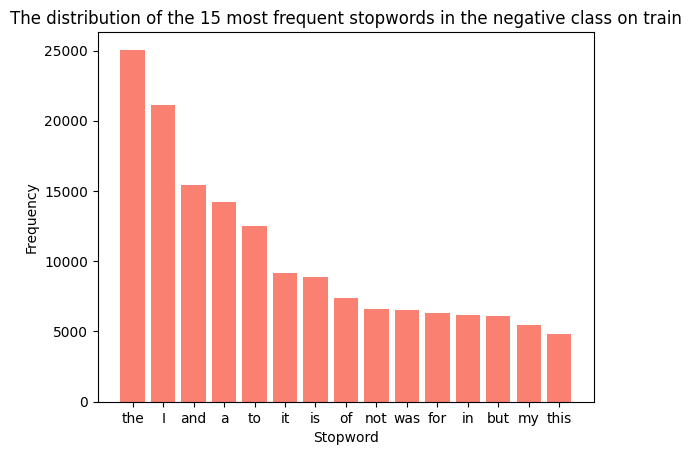

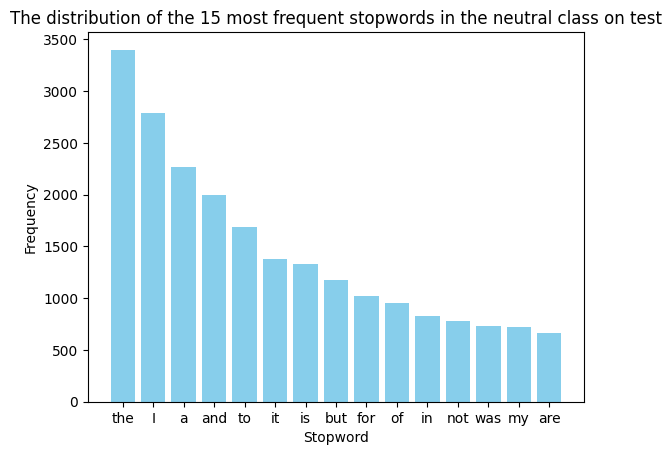

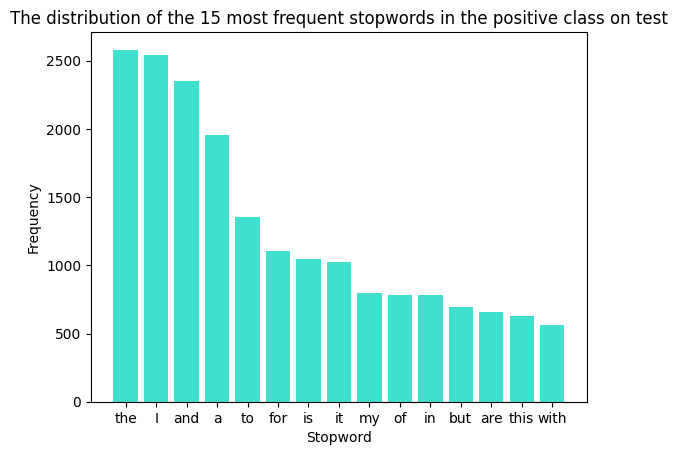

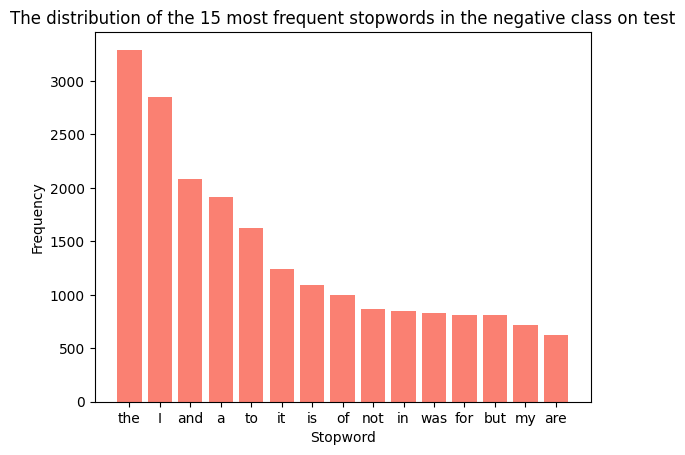

In [20]:
plot_stopwords_per_clasa('neutral', 'skyblue', train_data_plot, 'train')
plot_stopwords_per_clasa('positive', 'turquoise', train_data_plot, 'train')
plot_stopwords_per_clasa('negative', 'salmon', train_data_plot, 'train')

plot_stopwords_per_clasa('neutral', 'skyblue', test_data_plot, 'test')
plot_stopwords_per_clasa('positive', 'turquoise', test_data_plot, 'test')
plot_stopwords_per_clasa('negative', 'salmon', test_data_plot, 'test')

In [73]:
def class_distribution(df):
    label_counts = df['label'].value_counts()
    
    label_counts.plot(kind='pie')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Class Distribution on Train Data')
    
    plt.show()
    
    rating_counts = df['overall'].value_counts()
    
    rating_counts.plot(kind='bar')
    plt.xlabel('Review')
    plt.ylabel('Number of Reviews')
    plt.title('Rating Distribution on Train Data')
    plt.xticks(rotation=45, ha='right')
    
    
    plt.show()

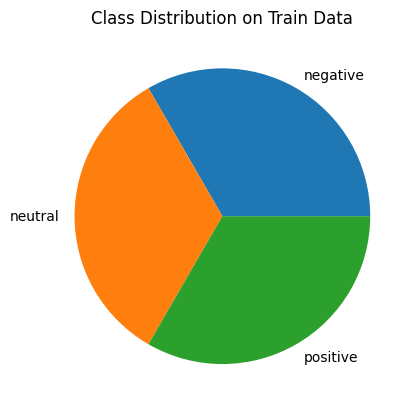

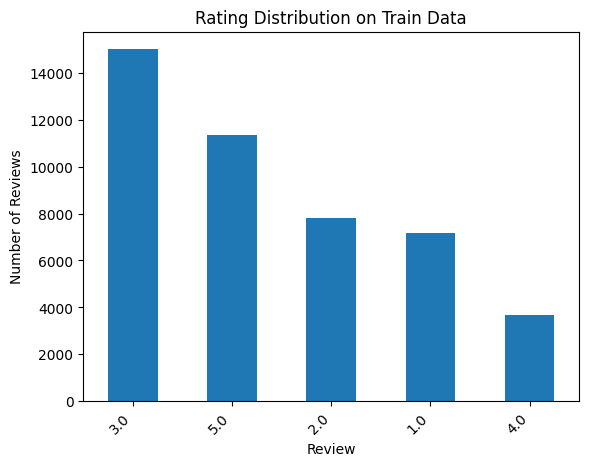

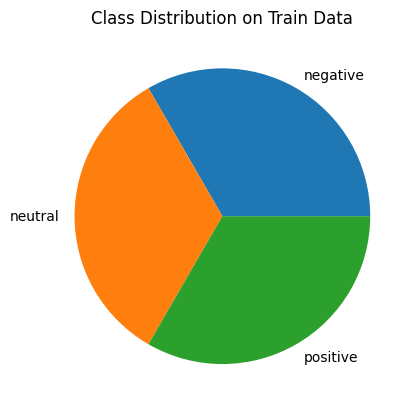

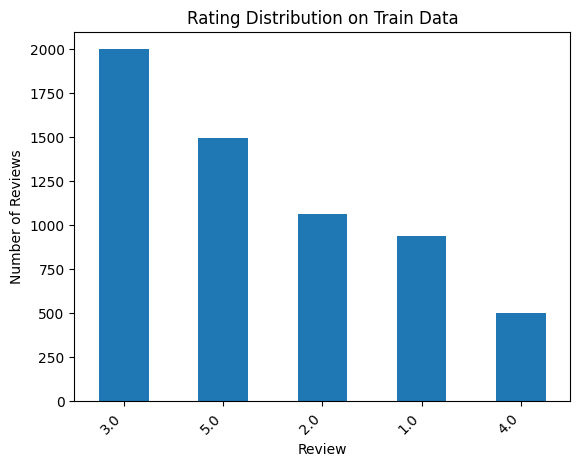

In [74]:
class_distribution(train_data_plot)
class_distribution(test_data_plot)

In [75]:
def count_punctuation(df):
    
    for i, label in enumerate(df['label'].unique()):
        df_label = df[df['label'] == label]
        
        punctuation_list = df_label['reviewText'].apply(lambda text: re.findall(r'[^\w\s]', text)).explode().tolist()
    
        top_punctuation = pd.Series(punctuation_list).value_counts().nlargest(10)
        top_punctuation.plot(kind='bar')
        plt.xlabel('Punctuation Mark')
        plt.ylabel('Count')
        plt.title(f'Punctuation Distribution for Label: {label}')
        plt.xticks(rotation=45, ha='right')
    
        plt.show()

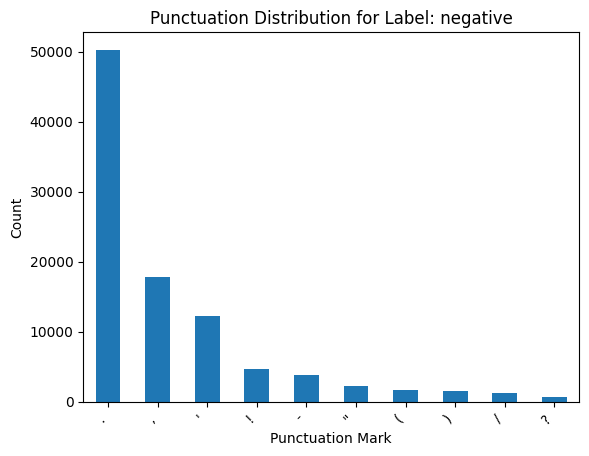

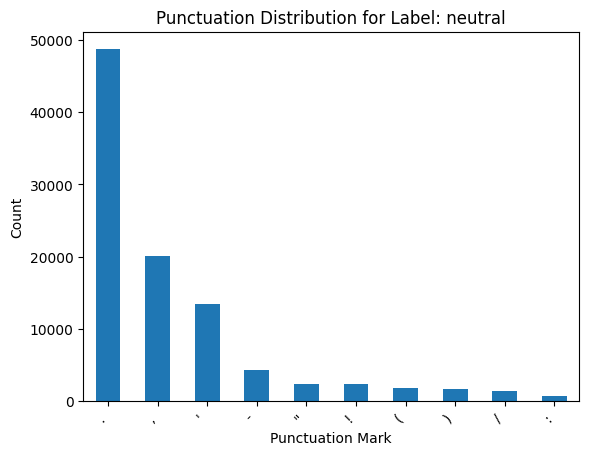

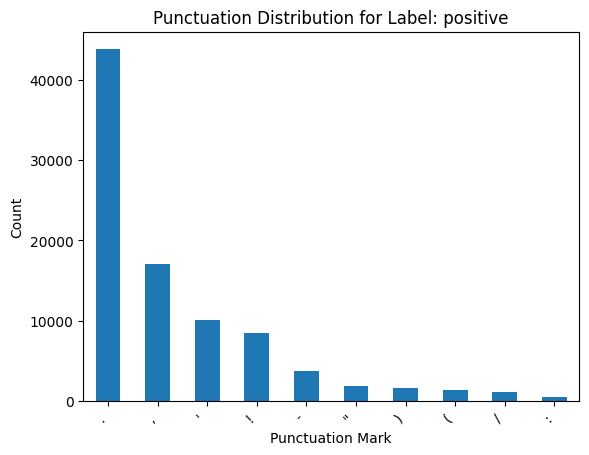

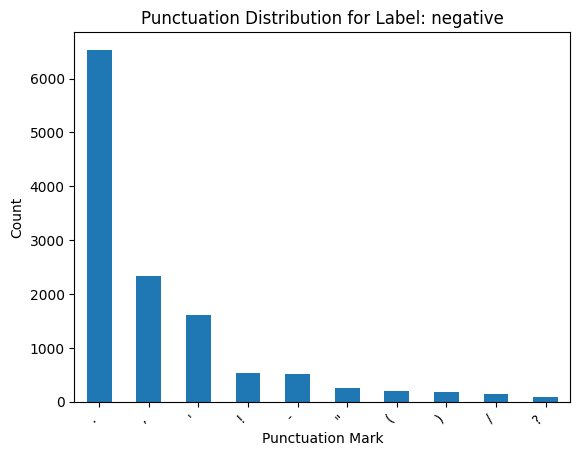

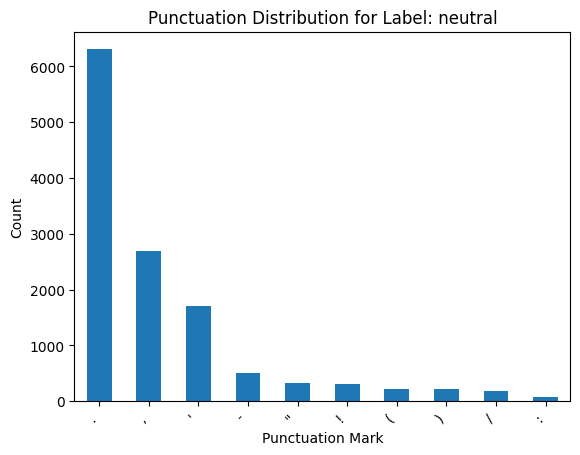

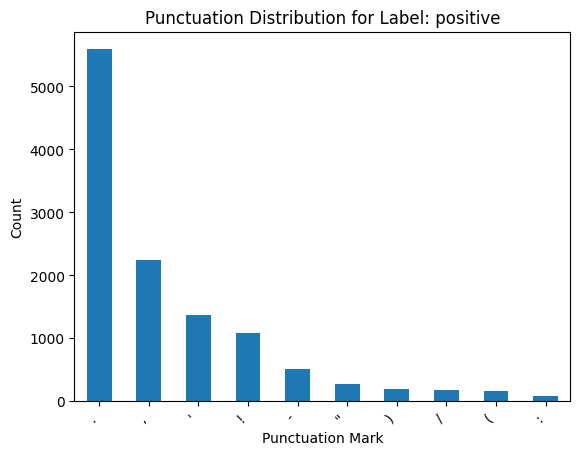

In [77]:
count_punctuation(train_data_plot)
count_punctuation(test_data_plot)

In [78]:
def plot_reviews_length(data_csv, label_csv):
    data_per_clasa = data_csv

    maximum_review = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    maximum_review_per_class = {'positive':0, 'negative':0, 'neutral':0}
    
    for index, row in data_per_clasa.iterrows():
        review_text = row['reviewText']
        words = review_text.split()

        lenght_of_review = len(words)

        if maximum_review[row['overall']] < lenght_of_review:
            maximum_review[row['overall']] = lenght_of_review
        if maximum_review_per_class[row['label']] < lenght_of_review:
            maximum_review_per_class[row['label']] = lenght_of_review    
            
    ratings = list(maximum_review.keys())
    lengths = list(maximum_review.values())

    # Plotting
    plt.plot(ratings, lengths, color='hotpink', marker='*',label='')
    plt.xlabel('Rating')
    plt.ylabel('Maximum Review Length')
    plt.title(f'Maximum Review Length for each Rating ({label_csv})')
    plt.xticks(ratings) 
    plt.show()
    
    print(maximum_review_per_class)
    ratings = list(maximum_review_per_class.keys())
    lengths = list(maximum_review_per_class.values())

    # Plotting
    plt.bar(ratings, lengths, color=['turquoise','salmon','skyblue'])
    plt.xlabel('Label')
    plt.ylabel('Maximum Review Length')
    plt.title(f'Maximum Review Length for each Label ({label_csv})')
    plt.show()
    

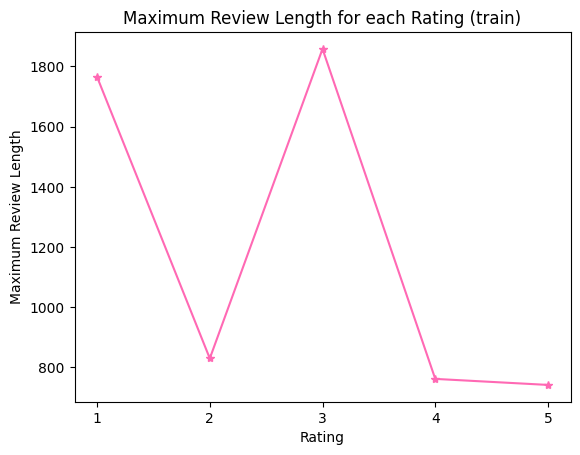

{'positive': 762, 'negative': 1765, 'neutral': 1858}


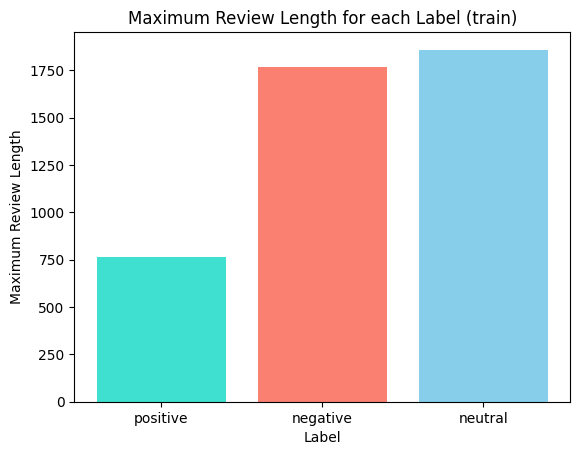

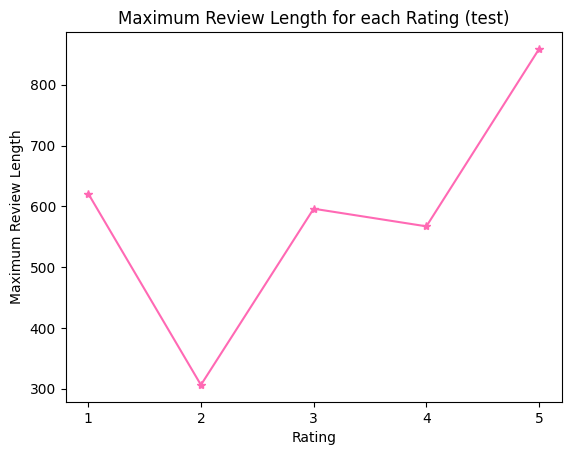

{'positive': 859, 'negative': 621, 'neutral': 596}


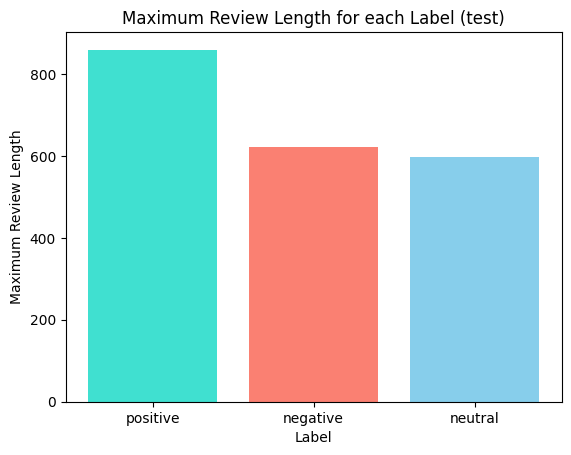

In [79]:
plot_reviews_length(train_data_plot, 'train')
plot_reviews_length(test_data_plot, 'test')

In [10]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
pos_tags_labels = {
    'ADJ': 'Adjective',
    'ADP': 'Adposition',
    'ADV': 'Adverb',
    'CONJ': 'Conjuction',
    'DET': 'Determiner/Article',
    'NOUN': 'Noun',
    'NUM': 'Numeral',
    'PRT': 'Particle',
    'PRON': 'Pronoun',
    'VERB': 'Verb',
    '.': 'Punctuation mark',
    'X': 'Other'
}

In [13]:
def get_pos_tags(texts):
  data = []

  for text in texts:
    pos_tags = Counter([j for _, j in nltk.pos_tag(nltk.word_tokenize(text), tagset = 'universal')])
    data.append(pos_tags)
    
  df = pd.DataFrame(data).fillna(0)
  return df

In [14]:
df_review_pos_train = get_pos_tags(train_data_plot['reviewText'].values)
df_review_pos_test = get_pos_tags(test_data_plot['reviewText'].values)

In [26]:
print(df_review_pos_train)

        ADV     .  PRON  VERB   ADJ   DET  NOUN   ADP  CONJ  PRT  NUM    X
0       3.0   3.0   2.0   3.0   3.0   2.0   2.0   0.0   0.0  0.0  0.0  0.0
1       2.0   4.0   1.0   2.0   1.0   3.0   9.0   3.0   1.0  0.0  0.0  0.0
2       1.0   5.0   3.0  10.0   5.0   5.0   8.0   2.0   2.0  2.0  0.0  0.0
3       8.0   6.0   9.0  15.0   7.0   6.0  10.0   9.0   2.0  2.0  1.0  0.0
4       4.0   6.0   8.0  11.0   6.0   8.0  12.0   3.0   1.0  1.0  0.0  0.0
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...  ...
44995   4.0   2.0   7.0   3.0   1.0   4.0  16.0   5.0   1.0  0.0  2.0  0.0
44996   0.0   2.0   2.0   2.0   2.0   1.0   1.0   0.0   0.0  0.0  0.0  0.0
44997  43.0  46.0  47.0  80.0  39.0  42.0  66.0  46.0  18.0  6.0  1.0  0.0
44998   4.0   5.0   3.0   5.0   5.0   3.0   6.0   4.0   1.0  0.0  1.0  0.0
44999   4.0   6.0   2.0   3.0   4.0   2.0   6.0   5.0   0.0  0.0  1.0  0.0

[45000 rows x 12 columns]


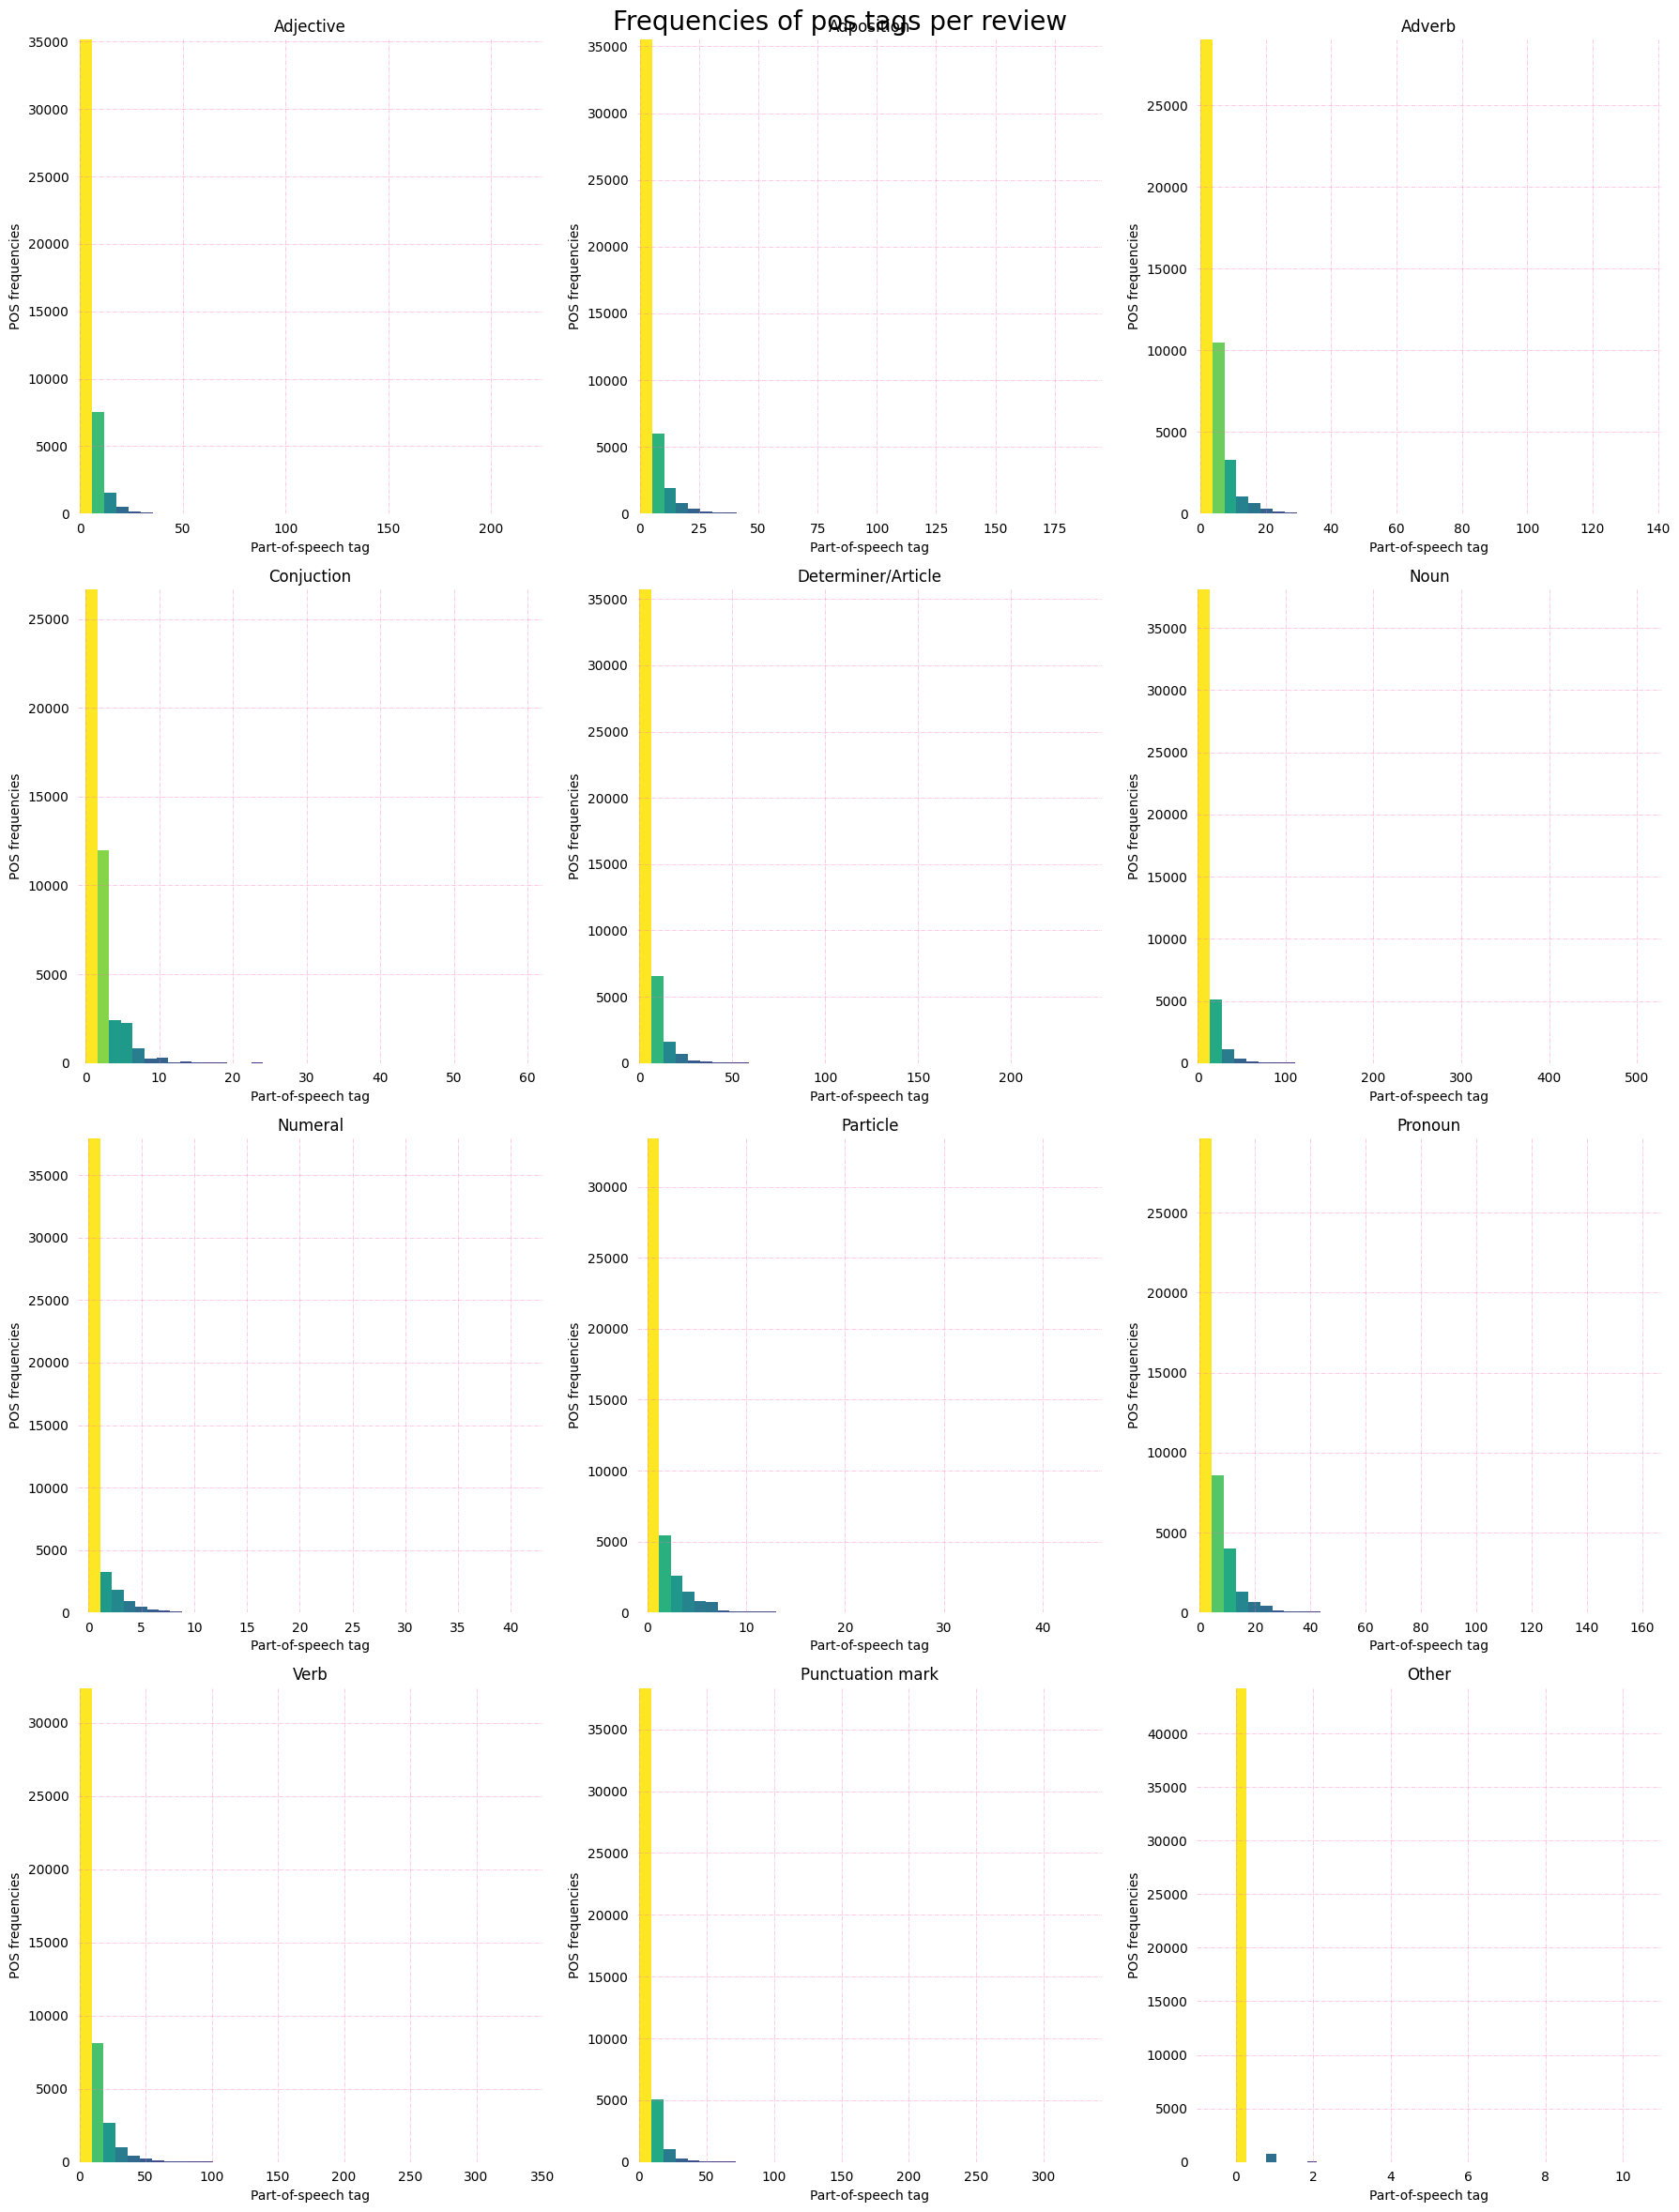

In [46]:
fig, axes = plt.subplots(int(len(pos_tags_labels) / 3), 3, figsize = (18, 24), tight_layout = False)

for nrow in range(int(len(pos_tags_labels) / 3)):
  for ncol in range(3):
    # Remove axes spines
    for spine in ['right', 'bottom', 'left', 'top']:
      axes[nrow, ncol].spines[spine].set_visible(False)

    # Remove x, y ticks
    axes[nrow, ncol].xaxis.set_ticks_position('none')
    axes[nrow, ncol].yaxis.set_ticks_position('none')

    # Add gridlines
    axes[nrow, ncol].grid(color = 'hotpink',
                          linestyle = '-.',
                          linewidth = 0.5,
                          alpha = 0.5)

fig.suptitle('Frequencies of pos tags per review', fontsize = 20)
for idx, (label, title) in enumerate(pos_tags_labels.items()):
  N, lower_limit, patches = axes[int(idx / 3), int(idx % 3)].hist(df_review_pos_train[label], bins = 38)

  fracs = ((N ** (1 / 4)) / N.max())
  norm = colors.Normalize(fracs.min(), fracs.max())
  
  for current_frac, current_patch in zip(fracs, patches):
      color = plt.cm.viridis(norm(current_frac))
      current_patch.set_facecolor(color)
  
  axes[int(idx / 3), int(idx % 3)].set_title(title)
  axes[int(idx / 3), int(idx % 3)].set_xlabel('Part-of-speech tag')
  axes[int(idx / 3), int(idx % 3)].set_ylabel('POS frequencies')

  axes[int(idx / 3), int(idx % 3)].set_xlim([df_review_pos_train[label].min() - 1, df_review_pos_train[label].max() + 1])
  axes[int(idx / 3), int(idx % 3)].set_ylim([N.min(), N.max() + 5])

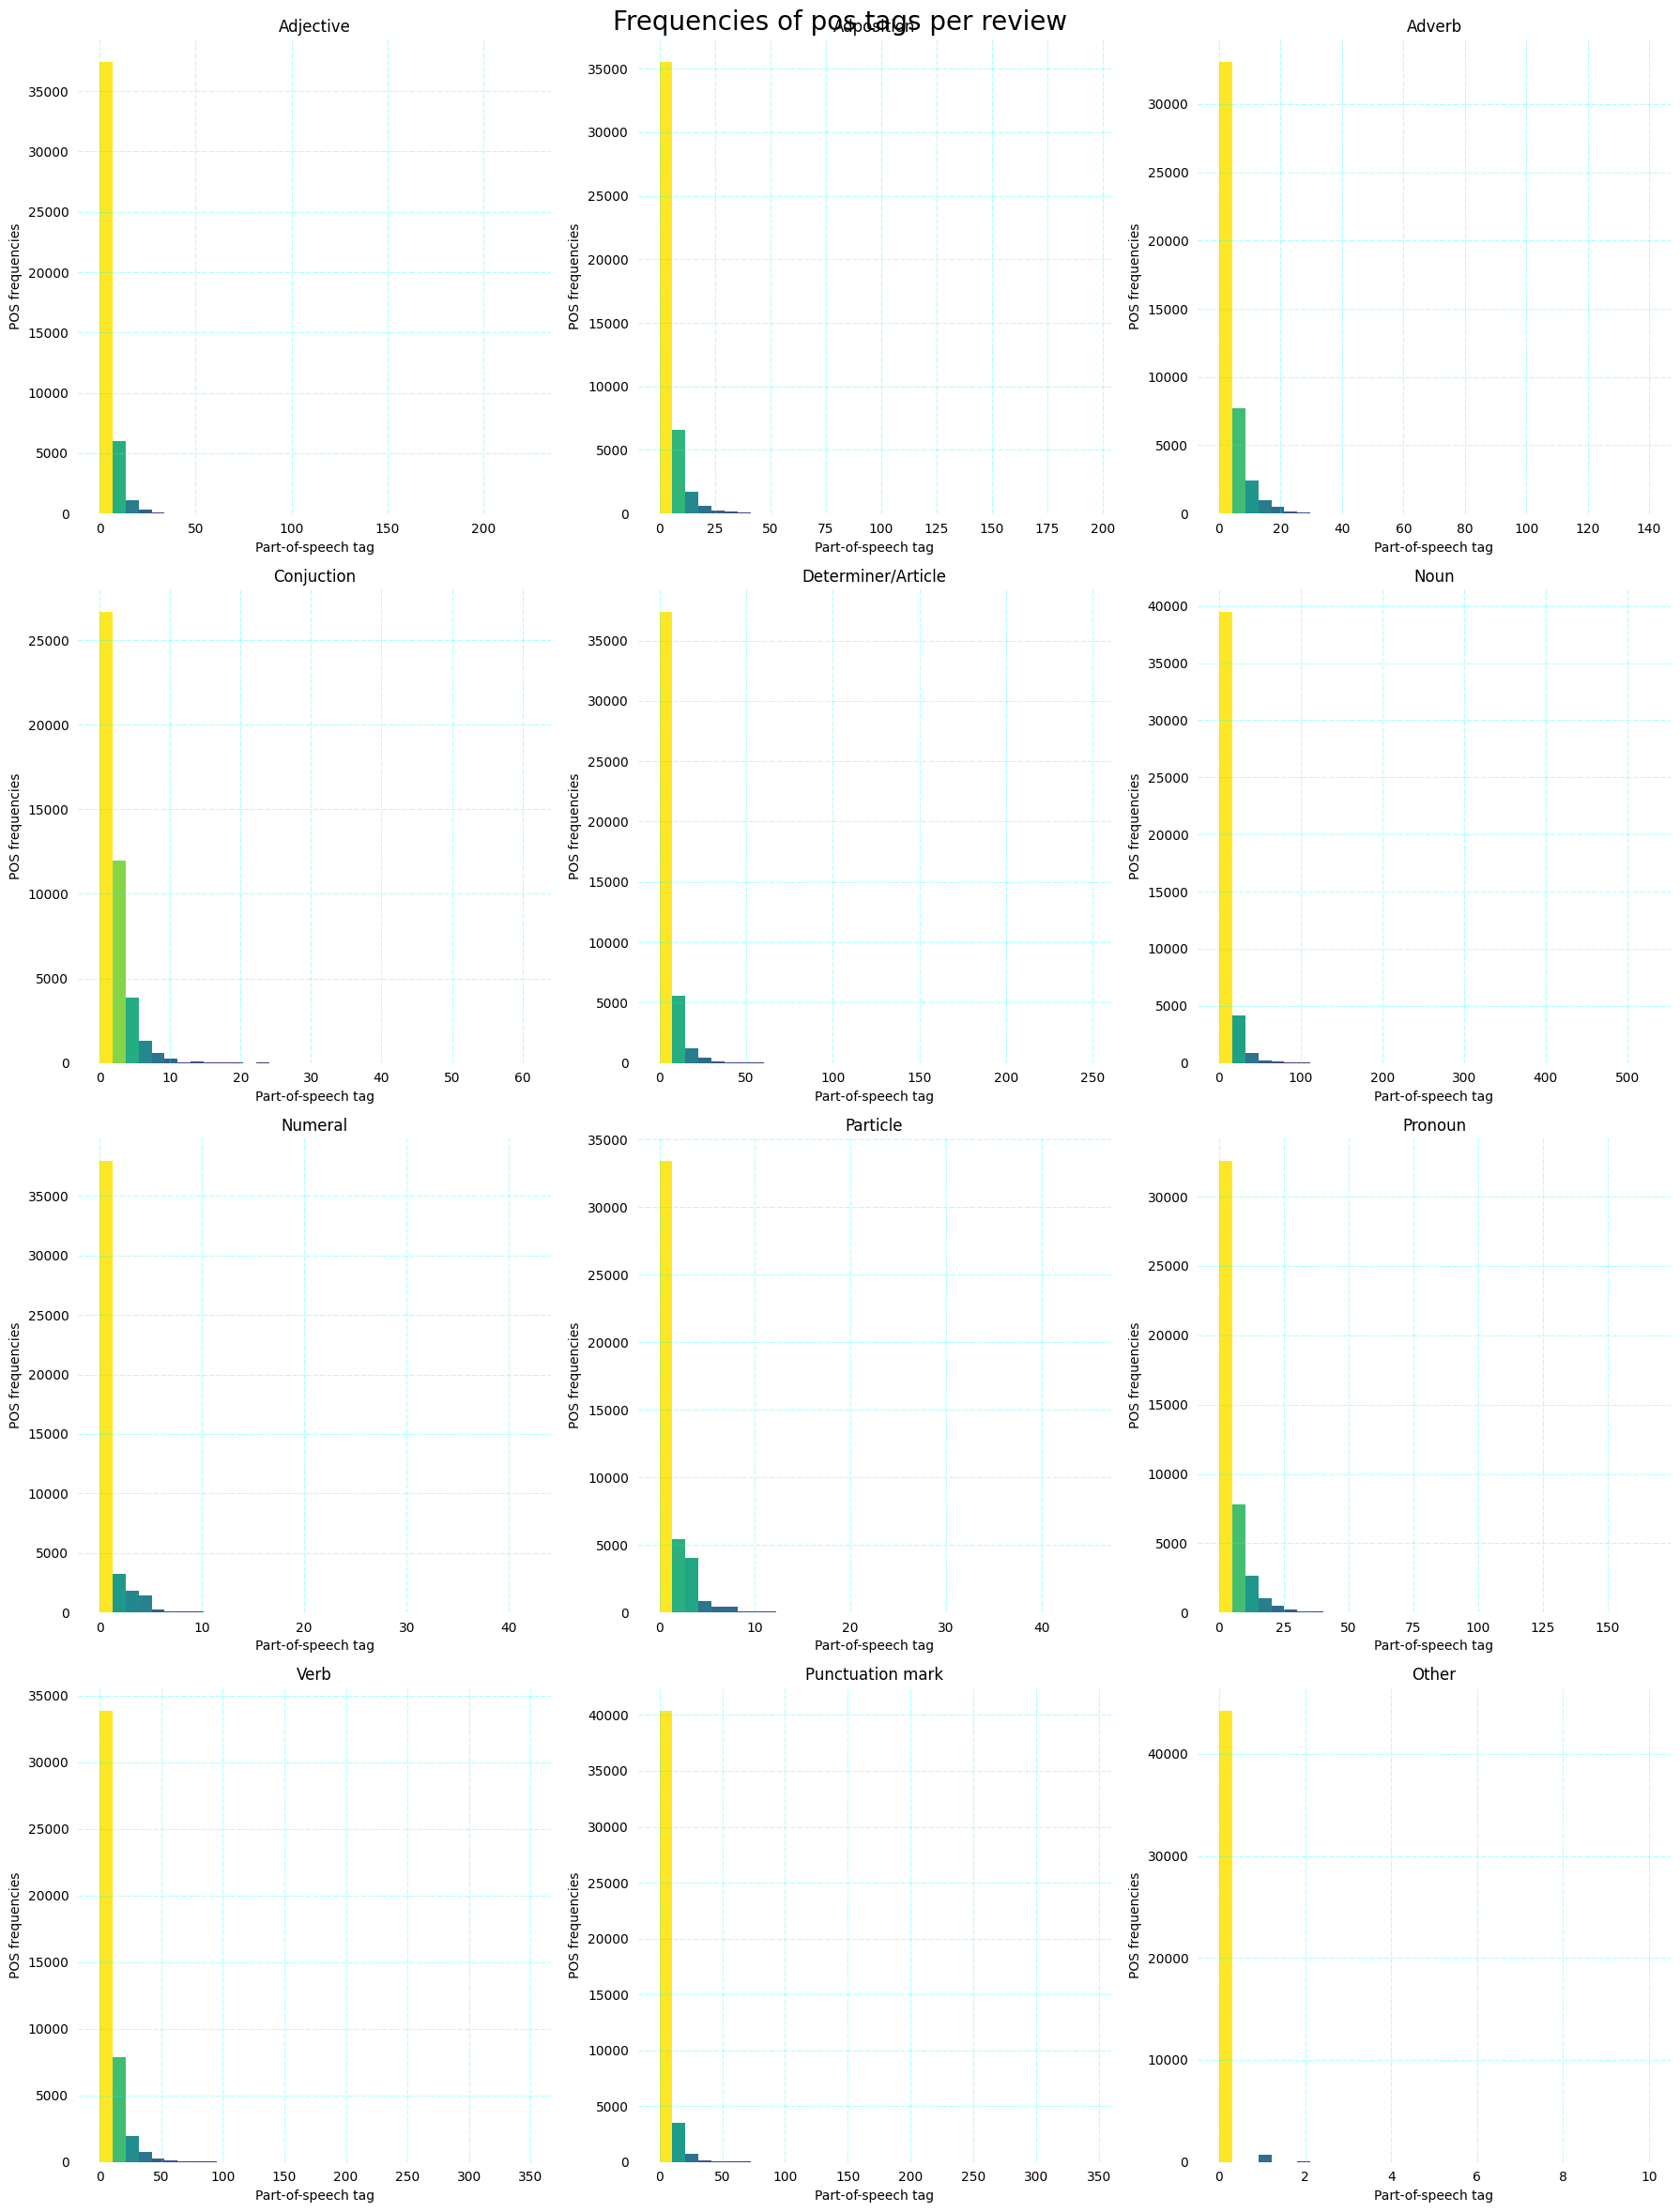

In [15]:
fig, axes = plt.subplots(int(len(pos_tags_labels) / 3), 3, figsize = (18, 24), tight_layout = False)

for nrow in range(int(len(pos_tags_labels) / 3)):
  for ncol in range(3):
    # Remove axes spines
    for spine in ['right', 'bottom', 'left', 'top']:
      axes[nrow, ncol].spines[spine].set_visible(False)

    # Remove x, y ticks
    axes[nrow, ncol].xaxis.set_ticks_position('none')
    axes[nrow, ncol].yaxis.set_ticks_position('none')

    # Add gridlines
    axes[nrow, ncol].grid( color = 'cyan',
                          linestyle = '-.',
                          linewidth = 0.5,
                          alpha = 0.5)

fig.suptitle('Frequencies of pos tags per review', fontsize = 20)
for idx, (label, title) in enumerate(pos_tags_labels.items()):
  N, lower_limit, patches = axes[int(idx / 3), int(idx % 3)].hist(df_review_pos_train[label], bins = 33)

  fracs = ((N ** (1 / 4)) / N.max())
  norm = colors.Normalize(fracs.min(), fracs.max())
  
  for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)
  
  axes[int(idx / 3), int(idx % 3)].set_title(title)
  axes[int(idx / 3), int(idx % 3)].set_xlabel('Part-of-speech tag')
  axes[int(idx / 3), int(idx % 3)].set_ylabel('POS frequencies')